In [90]:
from collections import defaultdict

import numpy as np
import pandas as pd
import numpy.random as random

import seaborn as sns

In [129]:
PRODUCTS_PER_CATEGORY = {
    "bread": [
        ("Sourdough", 5),
        ("Baguette", 10),
        ("Rye", 7),
        ("Pumpernickel", 1),
        ("Focaccia", 3),
    ],
    "cheese": [
        ("Brie", 3),
        ("Cheddar", 6),
        ("Mozzarella", 3),
        ("Gouda", 7),
        ("Roquefort", 1),
        ("Camembert", 10),
        ("Parmesan", 4),
    ],
    "salad": [
        ("Caesar", 10),
        ("Greek", 8),
        ("Cobb", 1),
        ("Caprese", 7),
        ("Waldorf", 3),
        ("Wedge", 2),
    ],
}


random.seed()

data = defaultdict(list)
for i in range(7613):
    for category, product_entries in PRODUCTS_PER_CATEGORY.items():
        names, probabilities = zip(*product_entries)
        probabilities = np.array(probabilities) / sum(probabilities)
        selected_products = random.choice(
            names,
            size=random.choice([1, 2, 3], p=[0.2, 0.5, 0.3]),
            replace=False,
            p=probabilities,
        )

        for product in selected_products:
            data['participant'].append(i)
            data['category'].append(category)
            data['product'].append(product)

data = pd.DataFrame.from_dict(data)
data

,participant,category,product
0,0,bread,Baguette
1,0,bread,Rye
2,0,cheese,Camembert
3,0,cheese,Gouda
4,0,cheese,Mozzarella
...,...,...,...
48070,7612,bread,Rye
48071,7612,cheese,Brie
48072,7612,cheese,Mozzarella
48073,7612,salad,Caesar


In [131]:
data.to_csv("food.csv", index=False)

<Axes: xlabel='count', ylabel='product'>

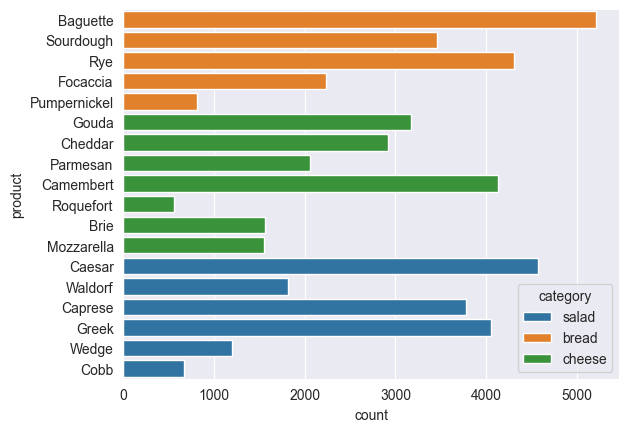

In [130]:
sns.countplot(
    data,
    y="product",
    hue="category",
    hue_order=['salad', 'bread', 'cheese'],
    order=data.sort_values(by=['category'])['product'].unique(),
)